In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import keras.initializers 
from keras import regularizers

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [3]:
FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
NewFVlen = 100
Class = 8
#RunFolder = "Default"
RunFolder = "03Feb2019"

Class = 8

In [5]:
# load dataset
dataframe = pd.read_csv(FilePath + "Runs/"+ RunFolder + "/FV100_fromResnet/Fixation_WeightedSum_Combined_Csv/TR_CombinedFixation_FeatureVector.csv", header=None)
X = dataframe.values.astype(float)
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/TR_Label.csv", header=None)
Y_temp = dataframe.values
Y = Y_temp[:,0]

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [7]:
y_train_one_hot = tf.keras.utils.to_categorical(Y, Class)

In [9]:
# load dataset
dataframe = pd.read_csv(FilePath + "Runs/"+ RunFolder + "/FV100_fromResnet/Fixation_WeightedSum_Combined_Csv/Val_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values.astype(float)


dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Val_Label.csv", header=None)
Ytest_temp = dataframe.values
Y_test = Ytest_temp[:,0]

In [10]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Ytest = encoder.transform(Y)


In [11]:
y_test_one_hot = tf.keras.utils.to_categorical(Y_test, Class)


In [12]:
#####VIJETH
########## HYPER PARAMETERS
batch_size = 512
epochs = 1200
optimizer = tf.keras.optimizers.Adadelta()
keras.initializers.glorot_normal(seed=None)
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(28, activation='relu',kernel_initializer='orthogonal', input_shape=(100,)))
model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(8, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(16, activation='relu'))#WAS removed 
model.add(tf.keras.layers.Dense(Class, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='kullback_leibler_divergence',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                2828      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 232       
Total params: 3,060
Trainable params: 3,060
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 216 samples, validate on 48 samples
Epoch 1/1200
216/216 [==============================]216/216 [==============================] - 1s 7ms/step - loss: 4.6919 - acc: 0.1481 - val_loss: 3.3851 - val_acc: 0.1667

Epoch 2/1200
216/216 [================


Epoch 40/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 2.2324 - acc: 0.1991 - val_loss: 1.9443 - val_acc: 0.2500

Epoch 41/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 2.2802 - acc: 0.1852 - val_loss: 1.9399 - val_acc: 0.2500

Epoch 42/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 2.2586 - acc: 0.2222 - val_loss: 1.9284 - val_acc: 0.2500

Epoch 43/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 2.2686 - acc: 0.2083 - val_loss: 1.9243 - val_acc: 0.2292

Epoch 44/1200
216/216 [==============================]216/216 [==============================] - 0s 39us/step - loss: 2.2563 - acc: 0.2130 - val_loss: 1.9223 - val_acc: 0.2500

Epoch 45/1200
216/216 [==============================]216/216 [==============================] - 0s 31us/step - lo


Epoch 87/1200
216/216 [==============================]216/216 [==============================] - 0s 98us/step - loss: 1.8715 - acc: 0.3241 - val_loss: 1.7184 - val_acc: 0.3750

Epoch 88/1200
216/216 [==============================]216/216 [==============================] - 0s 94us/step - loss: 1.8080 - acc: 0.3472 - val_loss: 1.7193 - val_acc: 0.3750

Epoch 89/1200
216/216 [==============================]216/216 [==============================] - 0s 100us/step - loss: 1.8517 - acc: 0.3241 - val_loss: 1.7186 - val_acc: 0.3750

Epoch 90/1200
216/216 [==============================]216/216 [==============================] - 0s 94us/step - loss: 1.8721 - acc: 0.3241 - val_loss: 1.7197 - val_acc: 0.3750

Epoch 91/1200
216/216 [==============================]216/216 [==============================] - 0s 80us/step - loss: 1.8733 - acc: 0.3426 - val_loss: 1.7090 - val_acc: 0.3750

Epoch 92/1200
216/216 [==============================]216/216 [==============================] - 0s 88us/step - l

216/216 [==============================]216/216 [==============================] - 0s 38us/step - loss: 1.7184 - acc: 0.4491 - val_loss: 1.6340 - val_acc: 0.4375

Epoch 134/1200
216/216 [==============================]216/216 [==============================] - 0s 39us/step - loss: 1.6639 - acc: 0.4120 - val_loss: 1.6301 - val_acc: 0.4583

Epoch 135/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.6986 - acc: 0.3843 - val_loss: 1.6317 - val_acc: 0.4375

Epoch 136/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.6989 - acc: 0.4167 - val_loss: 1.6378 - val_acc: 0.3958

Epoch 137/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.6747 - acc: 0.3981 - val_loss: 1.6358 - val_acc: 0.4583

Epoch 138/1200
216/216 [==============================]216/216 [==============================] - 0s 44us/step - loss: 1.7743

216/216 [==============================]216/216 [==============================] - 0s 96us/step - loss: 1.6609 - acc: 0.3796 - val_loss: 1.6027 - val_acc: 0.4375

Epoch 180/1200
216/216 [==============================]216/216 [==============================] - 0s 97us/step - loss: 1.6531 - acc: 0.3704 - val_loss: 1.5911 - val_acc: 0.4375

Epoch 181/1200
216/216 [==============================]216/216 [==============================] - 0s 106us/step - loss: 1.6800 - acc: 0.3704 - val_loss: 1.5974 - val_acc: 0.4583

Epoch 182/1200
216/216 [==============================]216/216 [==============================] - 0s 152us/step - loss: 1.7130 - acc: 0.3704 - val_loss: 1.5923 - val_acc: 0.4583

Epoch 183/1200
216/216 [==============================]216/216 [==============================] - 0s 97us/step - loss: 1.7216 - acc: 0.3611 - val_loss: 1.5948 - val_acc: 0.4792

Epoch 184/1200
216/216 [==============================]216/216 [==============================] - 0s 114us/step - loss: 1.6


Epoch 226/1200
216/216 [==============================]216/216 [==============================] - 0s 64us/step - loss: 1.5902 - acc: 0.4306 - val_loss: 1.5664 - val_acc: 0.4583

Epoch 227/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.6315 - acc: 0.4352 - val_loss: 1.5688 - val_acc: 0.4583

Epoch 228/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.7018 - acc: 0.4074 - val_loss: 1.5710 - val_acc: 0.4583

Epoch 229/1200
216/216 [==============================]216/216 [==============================] - 0s 36us/step - loss: 1.6596 - acc: 0.4213 - val_loss: 1.5805 - val_acc: 0.4375

Epoch 230/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.6792 - acc: 0.3750 - val_loss: 1.5800 - val_acc: 0.4583

Epoch 231/1200
216/216 [==============================]216/216 [==============================] - 0s 37us/ste

216/216 [==============================]216/216 [==============================] - 0s 51us/step - loss: 1.5428 - acc: 0.4398 - val_loss: 1.5530 - val_acc: 0.5000

Epoch 273/1200
216/216 [==============================]216/216 [==============================] - 0s 59us/step - loss: 1.5665 - acc: 0.4444 - val_loss: 1.5617 - val_acc: 0.5000

Epoch 274/1200
216/216 [==============================]216/216 [==============================] - 0s 112us/step - loss: 1.6511 - acc: 0.3843 - val_loss: 1.5540 - val_acc: 0.5000

Epoch 275/1200
216/216 [==============================]216/216 [==============================] - 0s 147us/step - loss: 1.4774 - acc: 0.4630 - val_loss: 1.5499 - val_acc: 0.4792

Epoch 276/1200
216/216 [==============================]216/216 [==============================] - 0s 180us/step - loss: 1.4935 - acc: 0.4398 - val_loss: 1.5487 - val_acc: 0.4792

Epoch 277/1200
216/216 [==============================]216/216 [==============================] - 0s 125us/step - loss: 1.


Epoch 318/1200
216/216 [==============================]216/216 [==============================] - 0s 88us/step - loss: 1.5787 - acc: 0.4444 - val_loss: 1.5509 - val_acc: 0.5000

Epoch 319/1200
216/216 [==============================]216/216 [==============================] - 0s 92us/step - loss: 1.5327 - acc: 0.4259 - val_loss: 1.5416 - val_acc: 0.4792

Epoch 320/1200
216/216 [==============================]216/216 [==============================] - 0s 88us/step - loss: 1.6293 - acc: 0.3287 - val_loss: 1.5561 - val_acc: 0.5000

Epoch 321/1200
216/216 [==============================]216/216 [==============================] - 0s 95us/step - loss: 1.5906 - acc: 0.3889 - val_loss: 1.5682 - val_acc: 0.5000

Epoch 322/1200
216/216 [==============================]216/216 [==============================] - 0s 91us/step - loss: 1.5909 - acc: 0.3935 - val_loss: 1.5682 - val_acc: 0.5000

Epoch 323/1200
216/216 [==============================]216/216 [==============================] - 0s 82us/ste

216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.4853 - acc: 0.4537 - val_loss: 1.5604 - val_acc: 0.5208

Epoch 365/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.4778 - acc: 0.4259 - val_loss: 1.5621 - val_acc: 0.5208

Epoch 366/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.5500 - acc: 0.3704 - val_loss: 1.5674 - val_acc: 0.5208

Epoch 367/1200
216/216 [==============================]216/216 [==============================] - 0s 31us/step - loss: 1.5611 - acc: 0.4352 - val_loss: 1.5734 - val_acc: 0.5417

Epoch 368/1200
216/216 [==============================]216/216 [==============================] - 0s 30us/step - loss: 1.5309 - acc: 0.4444 - val_loss: 1.5701 - val_acc: 0.5208

Epoch 369/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.5161

216/216 [==============================]216/216 [==============================] - 0s 101us/step - loss: 1.5264 - acc: 0.4537 - val_loss: 1.5584 - val_acc: 0.5417

Epoch 411/1200
216/216 [==============================]216/216 [==============================] - 0s 135us/step - loss: 1.5408 - acc: 0.4120 - val_loss: 1.5638 - val_acc: 0.5625

Epoch 412/1200
216/216 [==============================]216/216 [==============================] - 0s 107us/step - loss: 1.4987 - acc: 0.4815 - val_loss: 1.5628 - val_acc: 0.5625

Epoch 413/1200
216/216 [==============================]216/216 [==============================] - 0s 100us/step - loss: 1.5281 - acc: 0.3935 - val_loss: 1.5572 - val_acc: 0.5417

Epoch 414/1200
216/216 [==============================]216/216 [==============================] - 0s 111us/step - loss: 1.4330 - acc: 0.4676 - val_loss: 1.5625 - val_acc: 0.5417

Epoch 415/1200
216/216 [==============================]216/216 [==============================] - 0s 95us/step - loss: 1


Epoch 457/1200
216/216 [==============================]216/216 [==============================] - 0s 36us/step - loss: 1.4648 - acc: 0.4352 - val_loss: 1.5719 - val_acc: 0.5000

Epoch 458/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.4258 - acc: 0.4722 - val_loss: 1.5750 - val_acc: 0.5000

Epoch 459/1200
216/216 [==============================]216/216 [==============================] - 0s 37us/step - loss: 1.4750 - acc: 0.4630 - val_loss: 1.5795 - val_acc: 0.5208

Epoch 460/1200
216/216 [==============================]216/216 [==============================] - 0s 71us/step - loss: 1.4296 - acc: 0.4769 - val_loss: 1.5864 - val_acc: 0.5000

Epoch 461/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.5454 - acc: 0.4306 - val_loss: 1.5815 - val_acc: 0.5208

Epoch 462/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/ste

216/216 [==============================]216/216 [==============================] - 0s 76us/step - loss: 1.4493 - acc: 0.4769 - val_loss: 1.5838 - val_acc: 0.5000

Epoch 504/1200
216/216 [==============================]216/216 [==============================] - 0s 166us/step - loss: 1.3921 - acc: 0.4954 - val_loss: 1.5863 - val_acc: 0.5000

Epoch 505/1200
216/216 [==============================]216/216 [==============================] - 0s 100us/step - loss: 1.4925 - acc: 0.4259 - val_loss: 1.5785 - val_acc: 0.5208

Epoch 506/1200
216/216 [==============================]216/216 [==============================] - 0s 100us/step - loss: 1.4373 - acc: 0.4583 - val_loss: 1.5831 - val_acc: 0.5208

Epoch 507/1200
216/216 [==============================]216/216 [==============================] - 0s 105us/step - loss: 1.4207 - acc: 0.4630 - val_loss: 1.5853 - val_acc: 0.5208

Epoch 508/1200
216/216 [==============================]216/216 [==============================] - 0s 100us/step - loss: 1


Epoch 549/1200
216/216 [==============================]216/216 [==============================] - 0s 79us/step - loss: 1.3847 - acc: 0.4907 - val_loss: 1.5968 - val_acc: 0.5000

Epoch 550/1200
216/216 [==============================]216/216 [==============================] - 0s 94us/step - loss: 1.4506 - acc: 0.4491 - val_loss: 1.5939 - val_acc: 0.5000

Epoch 551/1200
216/216 [==============================]216/216 [==============================] - 0s 84us/step - loss: 1.4597 - acc: 0.4630 - val_loss: 1.6048 - val_acc: 0.5000

Epoch 552/1200
216/216 [==============================]216/216 [==============================] - 0s 99us/step - loss: 1.4494 - acc: 0.4676 - val_loss: 1.6021 - val_acc: 0.5000

Epoch 553/1200
216/216 [==============================]216/216 [==============================] - 0s 100us/step - loss: 1.4062 - acc: 0.5093 - val_loss: 1.6114 - val_acc: 0.5208

Epoch 554/1200
216/216 [==============================]216/216 [==============================] - 0s 101us/s

216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.3861 - acc: 0.4815 - val_loss: 1.6101 - val_acc: 0.4792

Epoch 596/1200
216/216 [==============================]216/216 [==============================] - 0s 31us/step - loss: 1.3658 - acc: 0.4537 - val_loss: 1.6047 - val_acc: 0.5000

Epoch 597/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.4138 - acc: 0.5046 - val_loss: 1.6123 - val_acc: 0.4792

Epoch 598/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.3706 - acc: 0.4907 - val_loss: 1.6165 - val_acc: 0.4792

Epoch 599/1200
216/216 [==============================]216/216 [==============================] - 0s 40us/step - loss: 1.3706 - acc: 0.5231 - val_loss: 1.6133 - val_acc: 0.5208

Epoch 600/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.3775

216/216 [==============================]216/216 [==============================] - 0s 107us/step - loss: 1.4227 - acc: 0.4769 - val_loss: 1.6155 - val_acc: 0.5000

Epoch 642/1200
216/216 [==============================]216/216 [==============================] - 0s 107us/step - loss: 1.3956 - acc: 0.4815 - val_loss: 1.6218 - val_acc: 0.4792

Epoch 643/1200
216/216 [==============================]216/216 [==============================] - 0s 112us/step - loss: 1.3673 - acc: 0.4907 - val_loss: 1.6119 - val_acc: 0.4792

Epoch 644/1200
216/216 [==============================]216/216 [==============================] - 0s 103us/step - loss: 1.3652 - acc: 0.5093 - val_loss: 1.6248 - val_acc: 0.5000

Epoch 645/1200
216/216 [==============================]216/216 [==============================] - 0s 142us/step - loss: 1.3726 - acc: 0.4907 - val_loss: 1.6313 - val_acc: 0.4792

Epoch 646/1200
216/216 [==============================]216/216 [==============================] - 0s 81us/step - loss: 1

216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.2979 - acc: 0.5185 - val_loss: 1.6387 - val_acc: 0.5208

Epoch 688/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.3677 - acc: 0.4676 - val_loss: 1.6426 - val_acc: 0.4792

Epoch 689/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.2973 - acc: 0.5093 - val_loss: 1.6514 - val_acc: 0.4583

Epoch 690/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.3037 - acc: 0.5046 - val_loss: 1.6456 - val_acc: 0.4583

Epoch 691/1200
216/216 [==============================]216/216 [==============================] - 0s 36us/step - loss: 1.2929 - acc: 0.5093 - val_loss: 1.6358 - val_acc: 0.4583

Epoch 692/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.3227


Epoch 734/1200
216/216 [==============================]216/216 [==============================] - 0s 108us/step - loss: 1.2371 - acc: 0.5139 - val_loss: 1.6421 - val_acc: 0.5000

Epoch 735/1200
216/216 [==============================]216/216 [==============================] - 0s 124us/step - loss: 1.2779 - acc: 0.5139 - val_loss: 1.6487 - val_acc: 0.5000

Epoch 736/1200
216/216 [==============================]216/216 [==============================] - 0s 110us/step - loss: 1.3586 - acc: 0.5278 - val_loss: 1.6403 - val_acc: 0.4792

Epoch 737/1200
216/216 [==============================]216/216 [==============================] - 0s 107us/step - loss: 1.2954 - acc: 0.5000 - val_loss: 1.6538 - val_acc: 0.4792

Epoch 738/1200
216/216 [==============================]216/216 [==============================] - 0s 172us/step - loss: 1.3333 - acc: 0.5185 - val_loss: 1.6533 - val_acc: 0.4792

Epoch 739/1200
216/216 [==============================]216/216 [==============================] - 0s 84u


Epoch 780/1200
216/216 [==============================]216/216 [==============================] - 0s 135us/step - loss: 1.2359 - acc: 0.5463 - val_loss: 1.6674 - val_acc: 0.5000

Epoch 781/1200
216/216 [==============================]216/216 [==============================] - 0s 88us/step - loss: 1.2868 - acc: 0.5139 - val_loss: 1.6687 - val_acc: 0.4792

Epoch 782/1200
216/216 [==============================]216/216 [==============================] - 0s 96us/step - loss: 1.2886 - acc: 0.5000 - val_loss: 1.6618 - val_acc: 0.4583

Epoch 783/1200
216/216 [==============================]216/216 [==============================] - 0s 65us/step - loss: 1.3096 - acc: 0.5046 - val_loss: 1.6611 - val_acc: 0.5000

Epoch 784/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.3055 - acc: 0.5370 - val_loss: 1.6596 - val_acc: 0.4792

Epoch 785/1200
216/216 [==============================]216/216 [==============================] - 0s 39us/st

216/216 [==============================]216/216 [==============================] - 0s 36us/step - loss: 1.3128 - acc: 0.5093 - val_loss: 1.6790 - val_acc: 0.4583

Epoch 827/1200
216/216 [==============================]216/216 [==============================] - 0s 41us/step - loss: 1.2338 - acc: 0.5000 - val_loss: 1.6754 - val_acc: 0.4583

Epoch 828/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.3102 - acc: 0.4676 - val_loss: 1.6743 - val_acc: 0.4583

Epoch 829/1200
216/216 [==============================]216/216 [==============================] - 0s 36us/step - loss: 1.2338 - acc: 0.5556 - val_loss: 1.6749 - val_acc: 0.5000

Epoch 830/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.2552 - acc: 0.5463 - val_loss: 1.6820 - val_acc: 0.4583

Epoch 831/1200
216/216 [==============================]216/216 [==============================] - 0s 40us/step - loss: 1.2976

216/216 [==============================]216/216 [==============================] - 0s 109us/step - loss: 1.3037 - acc: 0.4954 - val_loss: 1.6934 - val_acc: 0.5000

Epoch 873/1200
216/216 [==============================]216/216 [==============================] - 0s 115us/step - loss: 1.2836 - acc: 0.4815 - val_loss: 1.6934 - val_acc: 0.4792

Epoch 874/1200
216/216 [==============================]216/216 [==============================] - 0s 115us/step - loss: 1.2771 - acc: 0.5417 - val_loss: 1.6928 - val_acc: 0.5000

Epoch 875/1200
216/216 [==============================]216/216 [==============================] - 0s 166us/step - loss: 1.2866 - acc: 0.5370 - val_loss: 1.6867 - val_acc: 0.4792

Epoch 876/1200
216/216 [==============================]216/216 [==============================] - 0s 107us/step - loss: 1.3187 - acc: 0.4954 - val_loss: 1.6875 - val_acc: 0.5000

Epoch 877/1200
216/216 [==============================]216/216 [==============================] - 0s 106us/step - loss: 

216/216 [==============================]216/216 [==============================] - 0s 36us/step - loss: 1.3154 - acc: 0.5185 - val_loss: 1.6945 - val_acc: 0.5000

Epoch 919/1200
216/216 [==============================]216/216 [==============================] - 0s 39us/step - loss: 1.2837 - acc: 0.5046 - val_loss: 1.6941 - val_acc: 0.5000

Epoch 920/1200
216/216 [==============================]216/216 [==============================] - 0s 37us/step - loss: 1.2451 - acc: 0.5509 - val_loss: 1.6867 - val_acc: 0.4792

Epoch 921/1200
216/216 [==============================]216/216 [==============================] - 0s 37us/step - loss: 1.3143 - acc: 0.5093 - val_loss: 1.6904 - val_acc: 0.4792

Epoch 922/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.2080 - acc: 0.5463 - val_loss: 1.6858 - val_acc: 0.4792

Epoch 923/1200
216/216 [==============================]216/216 [==============================] - 0s 40us/step - loss: 1.1809

216/216 [==============================]216/216 [==============================] - 0s 106us/step - loss: 1.2722 - acc: 0.5093 - val_loss: 1.6972 - val_acc: 0.5000

Epoch 965/1200
216/216 [==============================]216/216 [==============================] - 0s 105us/step - loss: 1.2613 - acc: 0.5463 - val_loss: 1.6949 - val_acc: 0.5000

Epoch 966/1200
216/216 [==============================]216/216 [==============================] - 0s 106us/step - loss: 1.2473 - acc: 0.5694 - val_loss: 1.6982 - val_acc: 0.4792

Epoch 967/1200
216/216 [==============================]216/216 [==============================] - 0s 110us/step - loss: 1.2649 - acc: 0.5417 - val_loss: 1.7062 - val_acc: 0.5000

Epoch 968/1200
216/216 [==============================]216/216 [==============================] - 0s 110us/step - loss: 1.1589 - acc: 0.6065 - val_loss: 1.7039 - val_acc: 0.5000

Epoch 969/1200
216/216 [==============================]216/216 [==============================] - 0s 105us/step - loss: 


Epoch 1010/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.2153 - acc: 0.5602 - val_loss: 1.7158 - val_acc: 0.5000

Epoch 1011/1200
216/216 [==============================]216/216 [==============================] - 0s 38us/step - loss: 1.2507 - acc: 0.5278 - val_loss: 1.7158 - val_acc: 0.5208

Epoch 1012/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.2111 - acc: 0.5648 - val_loss: 1.7106 - val_acc: 0.5000

Epoch 1013/1200
216/216 [==============================]216/216 [==============================] - 0s 31us/step - loss: 1.1964 - acc: 0.5741 - val_loss: 1.7115 - val_acc: 0.5000

Epoch 1014/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.1945 - acc: 0.5278 - val_loss: 1.7155 - val_acc: 0.5000

Epoch 1015/1200
216/216 [==============================]216/216 [==============================] - 0s 42


Epoch 1056/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.1827 - acc: 0.5741 - val_loss: 1.7322 - val_acc: 0.5000

Epoch 1057/1200
216/216 [==============================]216/216 [==============================] - 0s 35us/step - loss: 1.1581 - acc: 0.5741 - val_loss: 1.7458 - val_acc: 0.5000

Epoch 1058/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.1561 - acc: 0.5648 - val_loss: 1.7459 - val_acc: 0.5000

Epoch 1059/1200
216/216 [==============================]216/216 [==============================] - 0s 36us/step - loss: 1.1406 - acc: 0.5463 - val_loss: 1.7479 - val_acc: 0.5000

Epoch 1060/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.2091 - acc: 0.5556 - val_loss: 1.7424 - val_acc: 0.5000

Epoch 1061/1200
216/216 [==============================]216/216 [==============================] - 0s 33


Epoch 1102/1200
216/216 [==============================]216/216 [==============================] - 0s 124us/step - loss: 1.1865 - acc: 0.5648 - val_loss: 1.7576 - val_acc: 0.5000

Epoch 1103/1200
216/216 [==============================]216/216 [==============================] - 0s 83us/step - loss: 1.1894 - acc: 0.5509 - val_loss: 1.7562 - val_acc: 0.5000

Epoch 1104/1200
216/216 [==============================]216/216 [==============================] - 0s 120us/step - loss: 1.2461 - acc: 0.5139 - val_loss: 1.7532 - val_acc: 0.4792

Epoch 1105/1200
216/216 [==============================]216/216 [==============================] - 0s 102us/step - loss: 1.1420 - acc: 0.5694 - val_loss: 1.7511 - val_acc: 0.5000

Epoch 1106/1200
216/216 [==============================]216/216 [==============================] - 0s 134us/step - loss: 1.1955 - acc: 0.5417 - val_loss: 1.7564 - val_acc: 0.5000

Epoch 1107/1200
216/216 [==============================]216/216 [==============================] - 0


Epoch 1148/1200
216/216 [==============================]216/216 [==============================] - 0s 32us/step - loss: 1.2184 - acc: 0.5324 - val_loss: 1.7607 - val_acc: 0.5000

Epoch 1149/1200
216/216 [==============================]216/216 [==============================] - 0s 34us/step - loss: 1.1929 - acc: 0.5139 - val_loss: 1.7714 - val_acc: 0.5000

Epoch 1150/1200
216/216 [==============================]216/216 [==============================] - 0s 33us/step - loss: 1.2691 - acc: 0.5278 - val_loss: 1.7810 - val_acc: 0.5000

Epoch 1151/1200
216/216 [==============================]216/216 [==============================] - 0s 31us/step - loss: 1.1740 - acc: 0.5972 - val_loss: 1.7755 - val_acc: 0.5208

Epoch 1152/1200
216/216 [==============================]216/216 [==============================] - 0s 31us/step - loss: 1.1528 - acc: 0.5787 - val_loss: 1.7802 - val_acc: 0.5000

Epoch 1153/1200
216/216 [==============================]216/216 [==============================] - 0s 34


Epoch 1194/1200
216/216 [==============================]216/216 [==============================] - 0s 111us/step - loss: 1.2352 - acc: 0.5463 - val_loss: 1.7884 - val_acc: 0.5000

Epoch 1195/1200
216/216 [==============================]216/216 [==============================] - 0s 92us/step - loss: 1.2391 - acc: 0.5556 - val_loss: 1.7702 - val_acc: 0.5000

Epoch 1196/1200
216/216 [==============================]216/216 [==============================] - 0s 105us/step - loss: 1.2637 - acc: 0.5185 - val_loss: 1.7583 - val_acc: 0.5000

Epoch 1197/1200
216/216 [==============================]216/216 [==============================] - 0s 177us/step - loss: 1.2147 - acc: 0.5463 - val_loss: 1.7598 - val_acc: 0.5000

Epoch 1198/1200
216/216 [==============================]216/216 [==============================] - 0s 100us/step - loss: 1.2127 - acc: 0.5417 - val_loss: 1.7586 - val_acc: 0.5000

Epoch 1199/1200
216/216 [==============================]216/216 [==============================] - 0

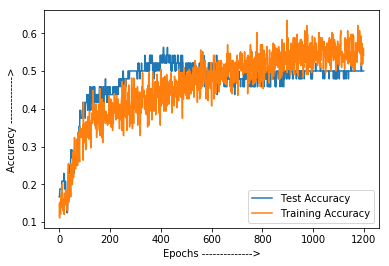

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.ylabel('Accuracy ------------->')
plt.xlabel('Epochs -------------->')
plt.legend()

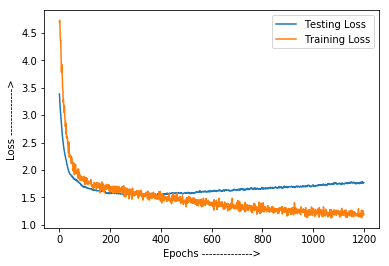

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label="Testing Loss")
plt.plot(history.history['loss'], label="Training Loss")
plt.ylabel('Loss ------------->')
plt.xlabel('Epochs -------------->')
plt.legend()

In [15]:
import datetime
now = datetime.datetime.now()
TempName = str(now.day) +str(now.month)+ str(now.hour) + str(now.minute)

# serialize model to JSON
model_json = model.to_json()
with open(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/"+ TempName +"Predict_DNN_100FVfromResnet_8Class.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/"+ TempName +"Predict_DNN_100FVfromResnet_8Class.h5")
print("Saved model to disk")

Saved model to disk
